# Tarea 2

_Instrucciones_

- El formato de entrega del control es "ApellidoNombre.ipynb"
- Puede usar cualquier herramienta que estime conveniente para completar este control
- Todos los gráficos deben llevar un título representativo y deben estar bien formateados
    - Gráficos sin texto o con texto ilegible se corregirán con puntaje mínimo
- Comente su código: explique **brevemente** qué es lo que hace cada bloque de código o función
- Se descuenta por ortografía y redacción

In [ ]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 1: Diabetes

Información del dataset _diabetes_:

```
Pregnancies: Número de embarazos
Glucose: Nivel de Glucosa en la sangre
BloodPressure: Presión de la sangre
SkinThickness: Espesor de la piel
Insulin: Insulina en la sangre
BMI: Índice de masa corporal
Age: Edad del paciente
```



### Preprocesamiento

Abrir los archivos _diabetesOriginal.csv_ y _diabetesDf.csv_. Trabajando sobre el segundo:

1. Obtener información del dataframe. Arreglar los registros con tipo `string` en vez del numérico correspondiente.

2. Revisar si existen registros duplicados y quítelos. Revise si existen valores atípicos, graficando boxplots para visualizarlos, y elimine el registro correspondiente.

3. Para cada método de procesamiento de nulos cree un dataframe distinto:
    - Elimine los registros con valores nulos
    - Rellene con método "ffill"
    - Rellene con la media de la columna
    - Rellene con la mediana de la columna
    - Rellene con valores aleatorios (`random_state=4`) en el intervalo:
$[\overline{x}-\sigma, \overline{x}+\sigma]$

4. Calcule estadísticos básicos para cada uno de los dataframes obtenidos y compare los resultados con el dataframe original. ¿Qué método es el que más se acerca al original?

In [ ]:
#Abrir archivos desde drive
Ruta1 = "/content/drive/MyDrive/diabetesDf.csv"
diabetes = pd.read_csv(Ruta1)

Ruta2 = "/content/drive/MyDrive/diabetesOriginal.csv"
diabetesOriginal = pd.read_csv(Ruta2)

In [ ]:
diabetes

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0,6.0,148,72.0,35.0,0,33.6,50.0
1,1,1.0,85,66.0,29.0,0,26.6,NaN
2,2,8.0,183,64.0,0.0,NaN,23.3,32.0
3,3,1.0,NaN,66.0,23.0,94,28.1,21.0
4,4,0.0,NaN,NaN,35.0,168,43.1,33.0
...,...,...,...,...,...,...,...,...
769,769,10.0,101,76.0,48.0,NaN,32.9,63.0
770,770,2.0,666,70.0,27.0,0,36.8,27.0
771,771,5.0,121,72.0,23.0,112,26.2,30.0
772,772,1.0,126,60.0,0.0,0,30.1,47.0


In [ ]:
diabetesOriginal

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63
764,2,122,70,27,0,36.8,27
765,5,121,72,23,112,26.2,30
766,1,126,60,0,0,30.1,47


In [ ]:
#quitar columna Unnamed
diabetes = diabetes.drop('Unnamed: 0', axis=1)

In [ ]:
#1.-Obtener información del dataframe. Arreglar los registros con tipo string en vez del numérico correspondiente.
#se crea un df con los nombres de las columnas
columnas = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'Age' ]
diabetes[columnas] = diabetes[columnas].apply(pd.to_numeric, errors='coerce')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,NaN
2,8.0,183.0,64.0,0.0,NaN,23.3,32.0
3,1.0,NaN,66.0,23.0,94.0,28.1,21.0
4,0.0,NaN,NaN,35.0,168.0,43.1,33.0
...,...,...,...,...,...,...,...
769,10.0,101.0,76.0,48.0,NaN,32.9,63.0
770,2.0,666.0,70.0,27.0,0.0,36.8,27.0
771,5.0,121.0,72.0,23.0,112.0,26.2,30.0
772,1.0,126.0,60.0,0.0,0.0,30.1,47.0


In [ ]:
#2.- Revisar si existen registros duplicados y quítelos.
diabetes = diabetes.drop_duplicates(keep='first')

diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,NaN
2,8.0,183.0,64.0,0.0,NaN,23.3,32.0
3,1.0,NaN,66.0,23.0,94.0,28.1,21.0
4,0.0,NaN,NaN,35.0,168.0,43.1,33.0
...,...,...,...,...,...,...,...
769,10.0,101.0,76.0,48.0,NaN,32.9,63.0
770,2.0,666.0,70.0,27.0,0.0,36.8,27.0
771,5.0,121.0,72.0,23.0,112.0,26.2,30.0
772,1.0,126.0,60.0,0.0,0.0,30.1,47.0


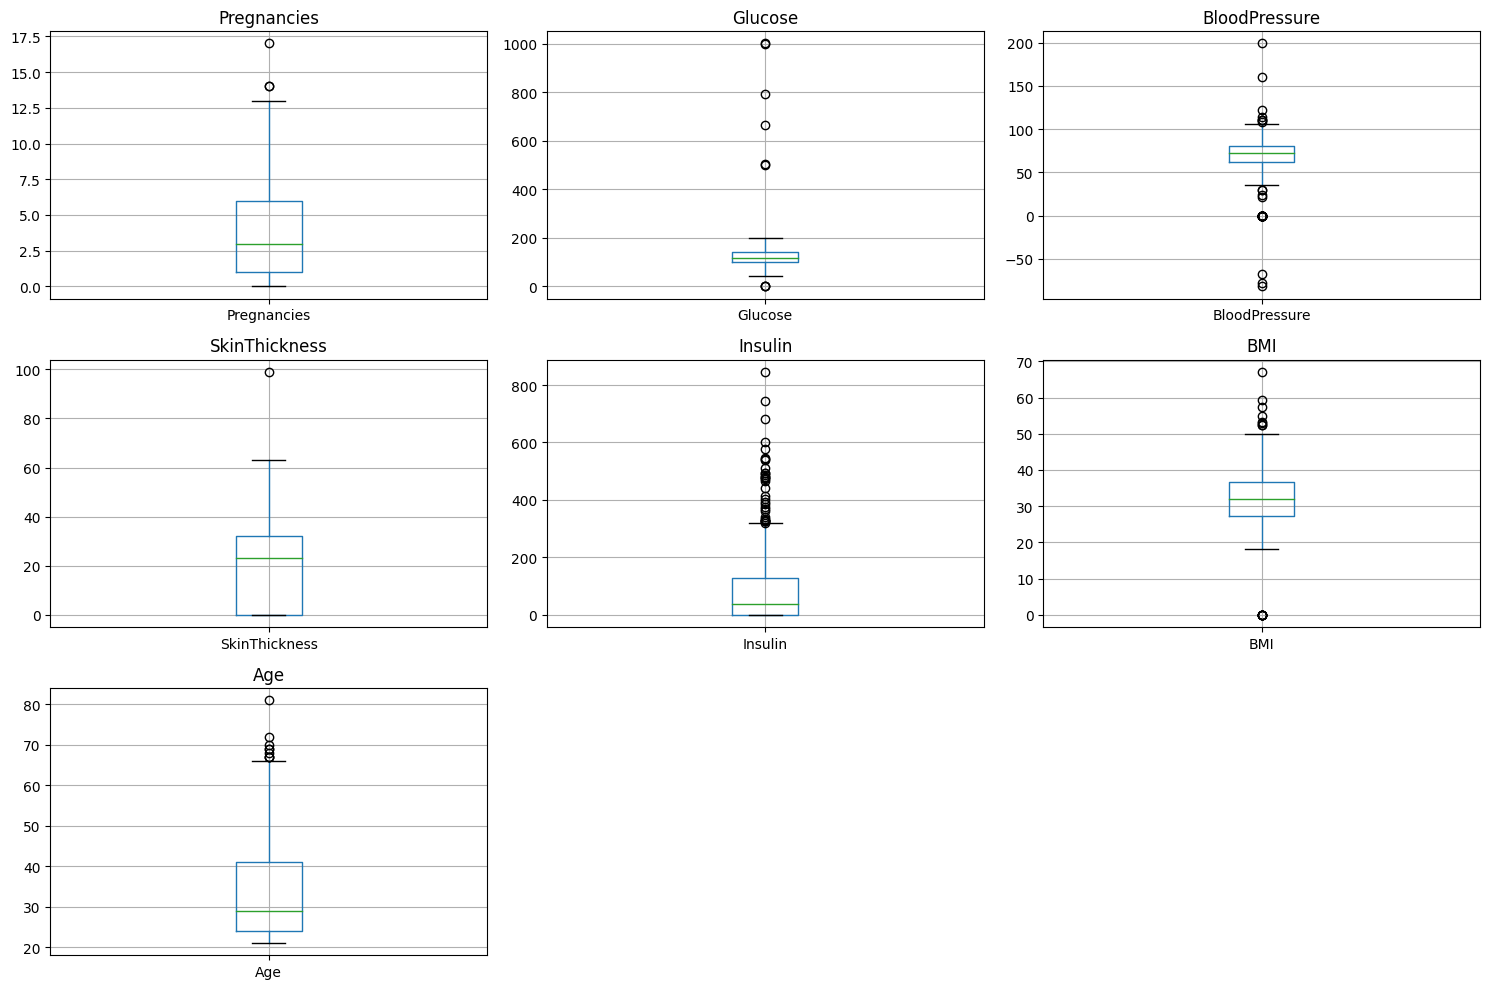

In [ ]:
#Revise si existen valores atípicos, graficando boxplots para visualizarlos
#graficar boxplots
plt.figure(figsize=(15, 10))

for column in diabetes.columns:
   plt.subplot(3, 3, diabetes.columns.get_loc(column) + 1)
   diabetes.boxplot(column)
   plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
#eliminar el registro correspondiente fijando un umbral (1.5)
atipicos = {column: [] for column in diabetes.columns}
for column in diabetes.columns:
  Q1 = diabetes[column].quantile(0.25)
  Q3 = diabetes[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

atipicos[column] = diabetes[(diabetes[column] < lower_bound) | (diabetes[column] > upper_bound)].index.tolist()
atipicos_combinados = sum(atipicos.values(), [])
diabetes = diabetes.drop(atipicos_combinados)

diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,NaN
2,8.0,183.0,64.0,0.0,NaN,23.3,32.0
3,1.0,NaN,66.0,23.0,94.0,28.1,21.0
4,0.0,NaN,NaN,35.0,168.0,43.1,33.0
...,...,...,...,...,...,...,...
769,10.0,101.0,76.0,48.0,NaN,32.9,63.0
770,2.0,666.0,70.0,27.0,0.0,36.8,27.0
771,5.0,121.0,72.0,23.0,112.0,26.2,30.0
772,1.0,126.0,60.0,0.0,0.0,30.1,47.0


In [ ]:
#Para cada método de procesamiento de nulos cree un dataframe distinto:
#Elimine los registros con valores nulos
diabetesDropna = diabetes.dropna()
diabetesDropna

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
6,3.0,78.0,50.0,32.0,88.0,31.0,26.0
7,10.0,115.0,0.0,0.0,0.0,35.3,29.0
8,2.0,197.0,70.0,45.0,543.0,30.5,53.0
12,10.0,139.0,80.0,0.0,0.0,27.1,57.0
...,...,...,...,...,...,...,...
767,9.0,170.0,74.0,31.0,0.0,44.0,43.0
768,9.0,89.0,62.0,0.0,0.0,22.5,33.0
770,2.0,666.0,70.0,27.0,0.0,36.8,27.0
771,5.0,121.0,72.0,23.0,112.0,26.2,30.0


In [ ]:
#Rellene con método "ffill"
diabetesFfill = diabetes.fillna(method='ffill')
diabetesFfill

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,50.0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0
3,1.0,183.0,66.0,23.0,94.0,28.1,21.0
4,0.0,183.0,66.0,35.0,168.0,43.1,33.0
...,...,...,...,...,...,...,...
769,10.0,101.0,76.0,48.0,0.0,32.9,63.0
770,2.0,666.0,70.0,27.0,0.0,36.8,27.0
771,5.0,121.0,72.0,23.0,112.0,26.2,30.0
772,1.0,126.0,60.0,0.0,0.0,30.1,47.0


In [ ]:
#Rellene con la media de la columna
diabetesMedia = diabetes.fillna(diabetes.mean())
diabetesMedia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.000000,148.000000,72.000000,35.0,0.000000,33.6,50.000000
1,1.000000,85.000000,66.000000,29.0,0.000000,26.6,32.905797
2,8.000000,183.000000,64.000000,0.0,82.753602,23.3,32.000000
3,1.000000,126.592868,66.000000,23.0,94.000000,28.1,21.000000
4,0.000000,126.592868,68.634074,35.0,168.000000,43.1,33.000000
...,...,...,...,...,...,...,...
769,10.000000,101.000000,76.000000,48.0,82.753602,32.9,63.000000
770,2.000000,666.000000,70.000000,27.0,0.000000,36.8,27.000000
771,5.000000,121.000000,72.000000,23.0,112.000000,26.2,30.000000
772,1.000000,126.000000,60.000000,0.0,0.000000,30.1,47.000000


In [ ]:
#Rellene con la mediana de la columna
diabetesMediana = diabetes.fillna(diabetes.median())
diabetesMediana

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,29.0
2,8.0,183.0,64.0,0.0,37.0,23.3,32.0
3,1.0,117.0,66.0,23.0,94.0,28.1,21.0
4,0.0,117.0,72.0,35.0,168.0,43.1,33.0
...,...,...,...,...,...,...,...
769,10.0,101.0,76.0,48.0,37.0,32.9,63.0
770,2.0,666.0,70.0,27.0,0.0,36.8,27.0
771,5.0,121.0,72.0,23.0,112.0,26.2,30.0
772,1.0,126.0,60.0,0.0,0.0,30.1,47.0


In [ ]:
#Rellene con valores aleatorios (random_state=4) en el intervalo:  [x−σ,x+σ]
diabetesRandom =diabetes

media = diabetes.mean()
desviacionStd = diabetes.std()

np.random.seed(4)

for column in diabetesRandom.columns:
  x = media[column]
  sigma = desviacionStd[column]
  diabetesRandom[column].fillna(np.random.normal(loc=x, scale=sigma), inplace=True)

diabetesRandom


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6.000000,148.000000,72.000000,35.0,0.000000,33.6,50.000000
1,1.000000,85.000000,66.000000,29.0,0.000000,26.6,25.630498
2,8.000000,183.000000,64.000000,0.0,33.097089,23.3,32.000000
3,1.000000,161.222234,66.000000,23.0,94.000000,28.1,21.000000
4,0.000000,161.222234,46.011417,35.0,168.000000,43.1,33.000000
...,...,...,...,...,...,...,...
769,10.000000,101.000000,76.000000,48.0,33.097089,32.9,63.000000
770,2.000000,666.000000,70.000000,27.0,0.000000,36.8,27.000000
771,5.000000,121.000000,72.000000,23.0,112.000000,26.2,30.000000
772,1.000000,126.000000,60.000000,0.0,0.000000,30.1,47.000000


In [ ]:
#Calcule estadísticos básicos para cada uno de los dataframes obtenidos y compare los resultados con el dataframe original.
#¿Qué método es el que más se acerca al original?

#para saber cual metodo se acerca mas, restaré los valores del dataframe de un metodo especifico con los del dataframe original

#Datos eliminados
datosDropna = diabetesDropna.describe()

In [ ]:
#metodo original
datosOriginal = diabetesOriginal.describe()

In [ ]:
#metodo ffill
datosFfill = diabetesFfill.describe()

diferenciaFfill = datosOriginal - datosFfill
diferenciaFfill

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.042681,-5.394006,-0.237087,0.055562,-3.034513,-0.326131,0.393718
std,0.003137,-34.206815,-3.343586,0.257846,-5.128973,0.048928,0.611544
min,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.500000,0.000000,0.000000,0.000000,-0.200000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-5.500000,-0.400000,0.000000
75%,0.000000,-1.750000,0.000000,0.000000,-2.750000,-0.150000,1.000000
max,0.000000,-803.000000,-77.000000,0.000000,0.000000,0.000000,15.000000


In [ ]:
#metodo media
datosMedia = diabetesMedia.describe()

diferenciaMedia = datosOriginal - datosMedia
diferenciaMedia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.010001,-5.698337,0.471395,-0.075611,-2.954123,-0.219978,0.335088
std,0.175436,-33.245288,-2.064186,0.779107,1.738008,0.546507,1.051268
min,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-2.500000,-2.000000,0.000000,0.000000,-0.700000,0.000000
50%,0.000000,-5.000000,2.000000,2.000000,-25.500000,-0.212556,-2.000000
75%,0.000000,3.250000,2.000000,0.000000,7.250000,0.800000,2.000000
max,0.000000,-803.000000,-77.000000,0.000000,0.000000,0.000000,15.000000


In [ ]:
#metodo mediana
datosMediana = diabetesMediana.describe()

diferenciaMediana = datosOriginal - datosMediana
diferenciaMediana

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.098017,-4.611398,0.098881,-0.273818,0.964170,-0.218489,0.690161
std,0.165147,-33.316224,-2.090234,0.764792,1.017255,0.546506,0.992487
min,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-2.500000,-2.000000,0.000000,0.000000,-0.700000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-6.500000,-0.200000,0.000000
75%,0.000000,3.250000,2.000000,0.000000,7.250000,0.800000,2.000000
max,0.000000,-803.000000,-77.000000,0.000000,0.000000,0.000000,15.000000


In [ ]:
#metodo valores aleatorios
datosRandom = diabetesRandom.describe()

diferenciaRandom = datosOriginal - datosRandom
diferenciaRandom

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,9.000000
mean,-0.007998,-9.622086,2.975088,-0.987881,1.298411,1.24867,0.996479
std,0.175006,-34.163721,-3.210856,0.478702,0.889521,-0.47619,0.848676
min,0.000000,0.000000,82.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,-2.500000,4.000000,0.000000,0.000000,2.30000,0.000000
50%,0.000000,-5.000000,2.000000,-2.000000,-2.597089,1.20000,1.000000
75%,0.000000,-16.750000,2.000000,0.000000,7.250000,0.80000,2.000000
max,0.000000,-803.000000,-77.000000,0.000000,0.000000,0.00000,15.000000


In [ ]:
#luego, voy a contar la cantidad de ceros en cada analisis resultantes de la resta anterior; y voy a imprimir la suma para cada metodo.
#No calculo la diferencia en el metodo de eliminar los registros con nulos, ya que la mayor diferencia es la cantidad de datos del dataframe.
cerosFfill = (diferenciaFfill == 0).sum()
cerosMedia = (diferenciaMedia == 0).sum()
cerosMediana = (diferenciaMediana == 0).sum()
cerosRandom = (diferenciaRandom == 0).sum()

print("ceros Ffill")
print(cerosFfill.sum())
print()
print("ceros Media")
print(cerosMedia.sum())
print()
print("ceros Mediana")
print(cerosMediana.sum())
print()
print("ceros Random")
print(cerosRandom.sum())

ceros Ffill
23

ceros Media
17

ceros Mediana
21

ceros Random
17


In [ ]:
#4.- respuesta:
#teniendo la suma de cantidad de ceros en todas las variables, se llega a la conclusion de que el metodo con el que el dataframe queda
#mas cercano al original, es el de ffill.

### Análisis
Dadas las siguientes condiciones:

- Personas con `BloodPressure` > 75
- Personas con sobrepeso (`BMI` > 25)
- Personas con obesidad (`BMI` > 30)
- Personas con `Glucose` > 125

Determinar:

1. Cantidad de ocurrencias de cada una
2. Cantidad de personas con `BloodPressure` > 75 y obesidad
3. Cantidad de personas con `Glucose` > 125 y obesidad
4. Generar un dataframe con todas las personas que no cumplan ninguna de las condiciones




In [ ]:
#ANALISIS
print("OCURRENCIAS DE CADA UNA")
print()
presion = diabetes['BloodPressure'] > 75
sobrepeso = diabetes['BMI'] > 25
obesidad = diabetes['BMI'] > 30
glucosa = diabetes['Glucose'] > 125

print("Personas con BloodPressure > 75")
print(presion.sum())
print()

print("Personas con sobrepeso (BMI > 25)")
print(sobrepeso.sum())
print()

print("Personas con obesidad (BMI > 30)")
print(obesidad.sum())
print()

print("Personas con Glucose > 125")
print(glucosa.sum())
print()
print()

print("PRESION Y OBESIDAD")
print((presion & obesidad).sum())
print()
print()

print("GLUCOSA Y OBESIDAD")
print((glucosa & obesidad).sum())
print()
print()

OCURRENCIAS DE CADA UNA

Personas con BloodPressure > 75
255

Personas con sobrepeso (BMI > 25)
566

Personas con obesidad (BMI > 30)
407

Personas con Glucose > 125
348


PRESION Y OBESIDAD
167


GLUCOSA Y OBESIDAD
223




In [ ]:
#dataframe con quienes no cumplen las condiciones
noCumplen = diabetes[~(presion | sobrepeso | obesidad | glucosa)]
noCumplen

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
20,4.005815,115.0,70.0,30.00000,96.000000,19.826959,32.000000
28,1.000000,97.0,66.0,15.00000,140.000000,23.200000,22.000000
33,3.000000,88.0,58.0,11.00000,33.097089,24.800000,22.000000
36,4.000000,103.0,60.0,33.00000,192.000000,24.000000,33.000000
52,7.000000,105.0,0.0,0.00000,0.000000,19.826959,24.000000
...,...,...,...,...,...,...,...
712,10.000000,115.0,0.0,0.00000,0.000000,0.000000,30.000000
723,10.000000,94.0,72.0,18.00000,0.000000,23.100000,56.000000
735,2.000000,92.0,52.0,31.60276,0.000000,19.826959,25.630498
740,2.000000,105.0,75.0,31.60276,33.097089,23.300000,53.000000


### Gráficos
En cada pregunta, interprete cada uno de los gráficos de la manera más completa posible.

1. Genere subgráficos boxplot para cada variable numérica. Formatee los gráficos agregando el valor de la media y la mediana en la figura.

2. Genere subgráficos de histograma horizontal y swarmplot para las columnas `Glucose`, `BMI` y `Age`.

3. Genere un joinplot para comparar las variables `Glucose` y `BMI`.

4. Calcule la correlación de las variables y genere un heatmap. Interprete los resultados obtenidos.

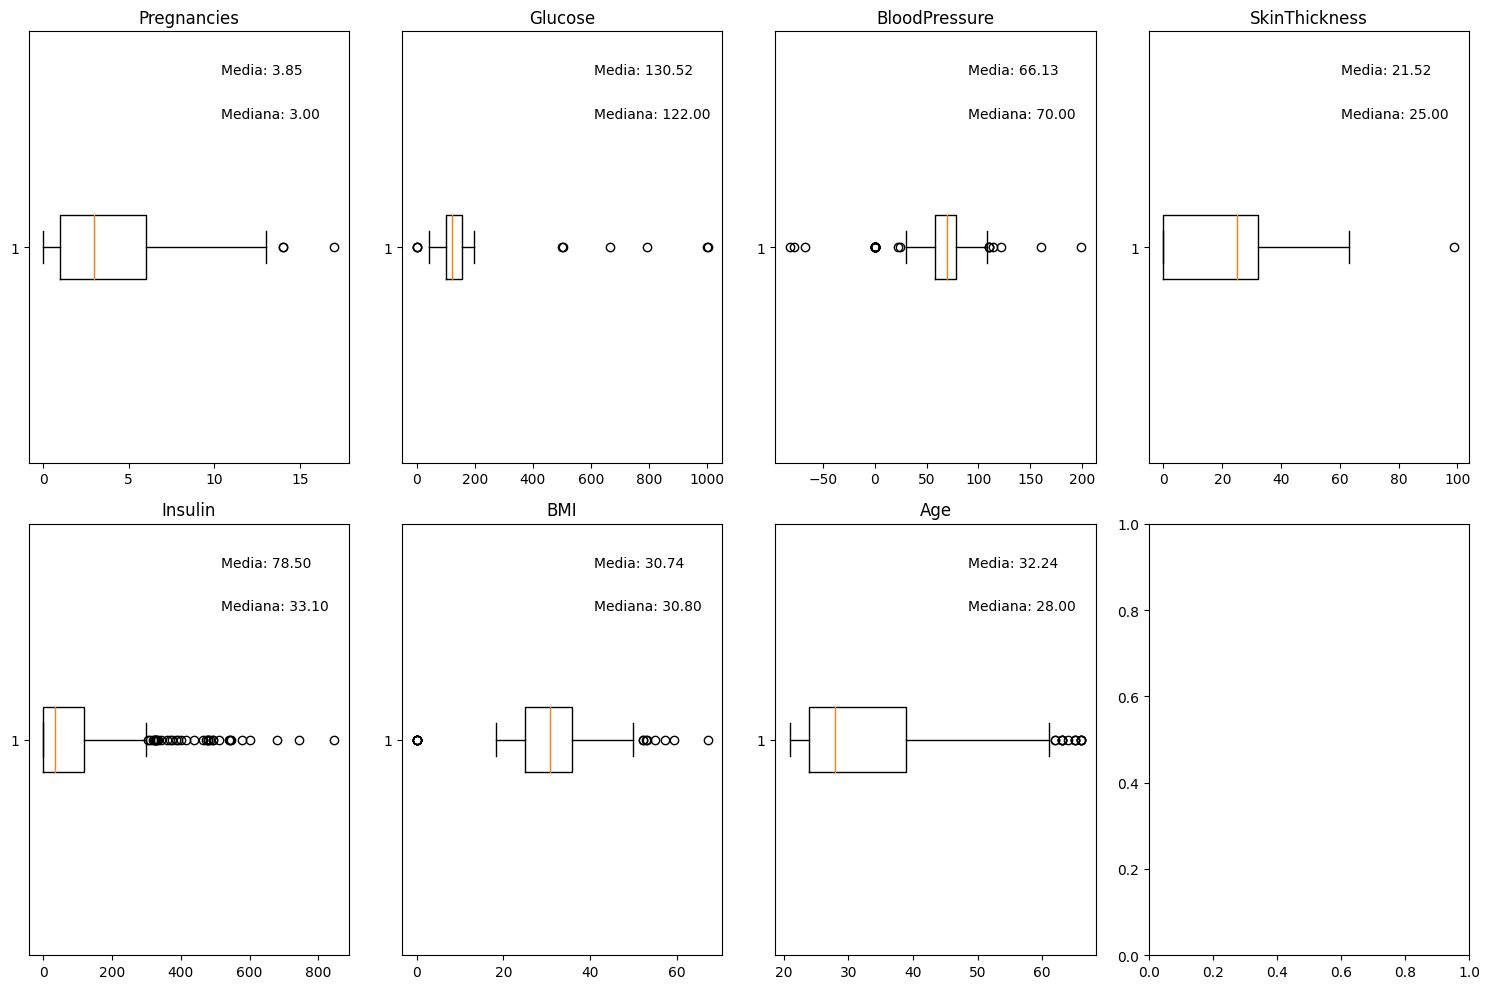

' \nLa linea naranja al medio de la caja indica la mediana, que ademas está escrita en el grafico. La caja interpreta el 50% de los datos, que va desde el primer cuartil hasta el\ntercer cuartil. El bigote o las lineas fuera de la caja son el 25% inferior y superior de los datos Los valores atipicos están representados con los circulos fuera de la caja \ny el bigote. \n'

In [ ]:
#1.- Genere subgráficos boxplot para cada variable numérica. Formatee los gráficos agregando el valor de la media y la mediana en la figura.
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axs = axs.flatten()

for i, variable in enumerate(variables):
  ax = axs[i]
  ax.boxplot(diabetes[variable].dropna(), vert=False)
  media = diabetes[variable].mean()
  mediana = diabetes[variable].median()
  ax.text(0.60, 0.9, f'Media: {media:.2f}', transform=ax.transAxes, fontsize=10)
  ax.text(0.60, 0.8, f'Mediana: {mediana:.2f}', transform=ax.transAxes, fontsize=10)
  ax.set_title(variable)

plt.tight_layout()
plt.show()

"""
La linea naranja al medio de la caja indica la mediana, que ademas está escrita en el grafico. La caja interpreta el 50% de los datos, que va desde el primer cuartil hasta el
tercer cuartil. El bigote o las lineas fuera de la caja son el 25% inferior y superior de los datos Los valores atipicos están representados con los circulos fuera de la caja
y el bigote.
"""

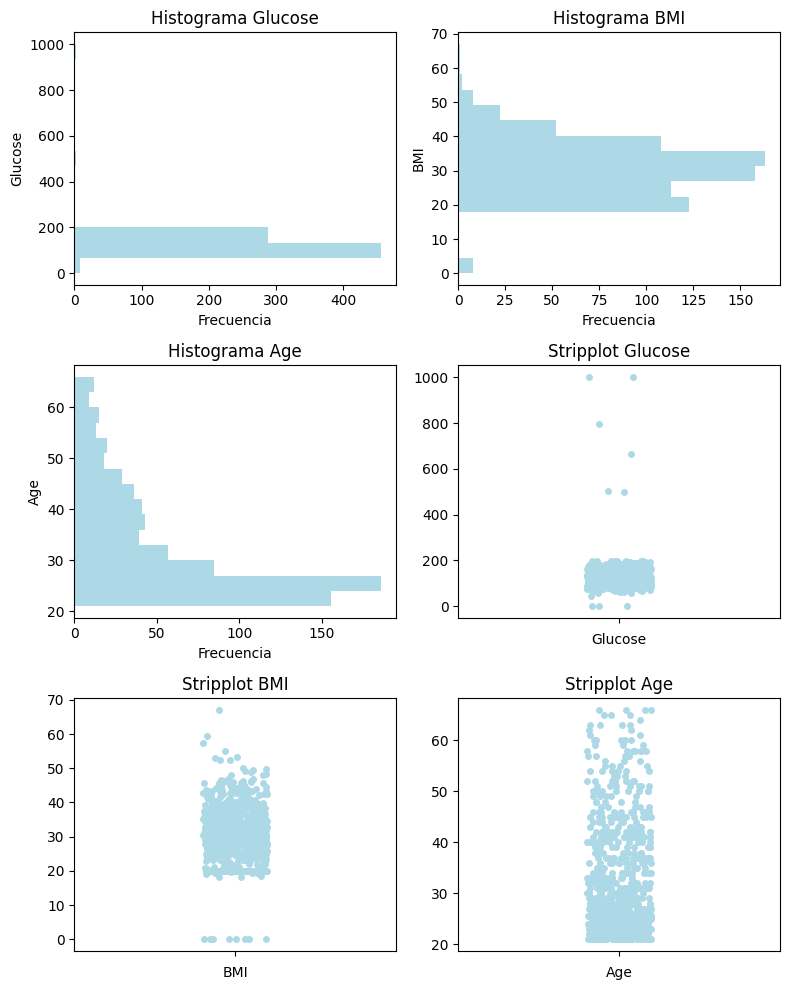

In [ ]:
#2.- Genere subgráficos de histograma horizontal y swarmplot para las columnas Glucose, BMI y Age.
columnas = ['Glucose', 'BMI', 'Age']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axs = axs.flatten()
for i, columna in enumerate(columnas):
  #histograma
  axs[i].hist(diabetes[columna].dropna(), bins=15, orientation='horizontal', color='lightblue')
  axs[i].set_title(f'Histograma {columna}')
  axs[i].set_xlabel('Frecuencia')
  axs[i].set_ylabel(columna)

  #stripplot
  sns.stripplot(ax=axs[i+3], y=diabetes[columna].dropna(), color='lightblue')
  axs[i+3].set_title(f'Stripplot {columna}')
  axs[i+3].set_xlabel(columna)
  axs[i+3].set_ylabel('')

plt.tight_layout()
plt.show()

#generé un stripplot en vez de un swarmplot, ya que el programa me lo recomendó por un error al compilar

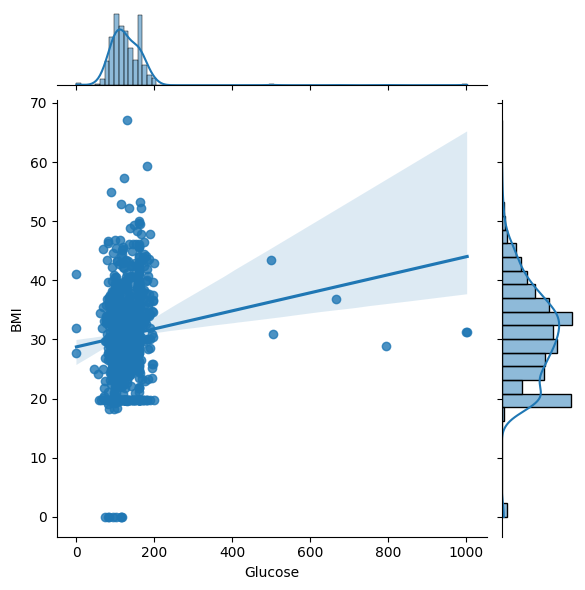

In [ ]:
#3.- Genere un joinplot para comparar las variables Glucose y BMI.
#filtro filas con datos no nulos para la glucosa y el bmi
df_filtrado = diabetes[['Glucose', 'BMI']].dropna()
sns.jointplot(data=df_filtrado, x='Glucose', y='BMI', kind='reg')
plt.show()

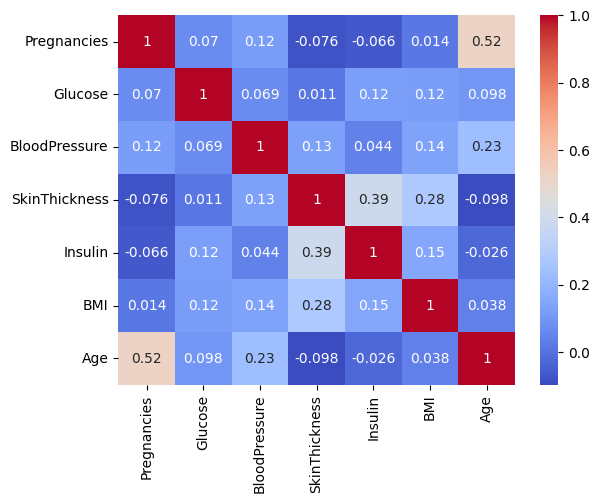

In [ ]:
#4.- Calcule la correlación de las variables y genere un heatmap. Interprete los resultados obtenidos.
correlacion_matriz = diabetes.corr()
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm')
plt.show()

## Parte 2: Accidentes en minería

Información del dataset _historico-accidentes.csv_:


```
N° REGIÓN
REGIÓN
GÉNERO
TIPO: tipo de trabajador (contratista o mandante)
ACCIDENTE FATAL: accidente que provocó la muerte
ACCIDENTE CON TIEMPO PERDIDO: accidente que provocó tiempo de reposo
TOTAL: total de accidentes
PERSONAS: personas que trabajan en el TIPO
HORAS/PERSONAS: corresponde a 1 hora de trabajo ininterrumpido de un trabajador medio
DIAS PERDIDOS
TASA DE FRECUENCIA: número de accidentes por millón de HH
TASA DE GRAVEDAD: número de días de ausencia por millón de HH
TASA DE FATALIDAD: número de fallecidos por millón de HH
AÑO
```



1. Abrir archivo _historico-accidentes.csv_, eliminar las columnas `N° REGIÓN`, `TIPO`, `PERSONAS`, `HORAS/PERSONAS`, `TASA DE FRECUENCIA`, `TASA DE GRAVEDAD` y `TASA DE FATALIDAD`.

2. Preprocesar los datos. Trabajar los valores nulos con el método que mejor resultados entregó el preprocesamiento de la Parte 1.

3. Calcular estadísticos básicos sin usar `pd.describe()` (media, moda, mediana, desviación estándar, cuartiles, máximo y mínimo).

4. Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por año. Interpretar los gráficos.

5. Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por género. Interpretar los gráficos.

6. Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por región. Interpretar los gráficos.

7. Crear subgráficos boxplot para la columna `DIAS PERDIDOS`. Elimine los valores atípicos y grafique nuevamente.

In [ ]:
Ruta3 = "/content/drive/MyDrive/accidentesMineria.xlsx"
historico_accidentes = pd.read_excel(Ruta3)

#ruta_csv = "/content/drive/MyDrive/accidentesMineria.csv"
#historico_accidentes.to_csv(ruta_csv, index=False)

In [ ]:
print(historico_accidentes)

     N° REGIÓN                                     REGIÓN   GÉNERO  \
0           15                         ARICA Y PARINACOTA  Mujeres   
1           15                         ARICA Y PARINACOTA  Mujeres   
2           15                         ARICA Y PARINACOTA  Varones   
3           15                         ARICA Y PARINACOTA  Varones   
4            1                                   TARAPACA  Mujeres   
..         ...                                        ...      ...   
355         11  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO  Varones   
356         12       MAGALLANES Y DE LA ANTARTICA CHILENA  Mujeres   
357         12       MAGALLANES Y DE LA ANTARTICA CHILENA  Mujeres   
358         12       MAGALLANES Y DE LA ANTARTICA CHILENA  Varones   
359         12       MAGALLANES Y DE LA ANTARTICA CHILENA  Varones   

            TIPO  ACCIDENTE FATAL  ACCIDENTE CON TIEMPO PERDIDO  TOTAL  \
0       Mandante              0.0                             0      0   
1    Contra

In [ ]:
#1 Abrir archivo historico-accidentes.csv, eliminar las columnas N° REGIÓN, TIPO, PERSONAS, HORAS/PERSONAS, TASA DE FRECUENCIA, TASA DE GRAVEDAD y TASA DE FATALIDAD.
#se crea una lista con las columnas a eliminar, se eliminan con drop
columnas_eliminar = ["N° REGIÓN", "TIPO", "PERSONAS", "HORAS/PERSONAS", "TASA DE FRECUENCIA", "TASA DE GRAVEDAD", "TASA DE FATALIDAD"]
historico_accidentes = historico_accidentes.drop(columns=columnas_eliminar)

print(historico_accidentes)

                                        REGIÓN   GÉNERO  ACCIDENTE FATAL  \
0                           ARICA Y PARINACOTA  Mujeres              0.0   
1                           ARICA Y PARINACOTA  Mujeres              0.0   
2                           ARICA Y PARINACOTA  Varones              0.0   
3                           ARICA Y PARINACOTA  Varones              0.0   
4                                     TARAPACA  Mujeres              0.0   
..                                         ...      ...              ...   
355  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO  Varones              0.0   
356       MAGALLANES Y DE LA ANTARTICA CHILENA  Mujeres              0.0   
357       MAGALLANES Y DE LA ANTARTICA CHILENA  Mujeres              0.0   
358       MAGALLANES Y DE LA ANTARTICA CHILENA  Varones              0.0   
359       MAGALLANES Y DE LA ANTARTICA CHILENA  Varones              0.0   

     ACCIDENTE CON TIEMPO PERDIDO  TOTAL  DIAS PERDIDOS   AÑO  
0                      

In [ ]:
#2 Preprocesar los datos. Trabajar los valores nulos con el método que mejor resultados entregó el preprocesamiento de la Parte 1.
#el mejor metodo fue ffill por lo que se trabaja con ese
historico_accidentes = historico_accidentes.fillna(method="ffill")
print(historico_accidentes)

                                        REGIÓN   GÉNERO  ACCIDENTE FATAL  \
0                           ARICA Y PARINACOTA  Mujeres              0.0   
1                           ARICA Y PARINACOTA  Mujeres              0.0   
2                           ARICA Y PARINACOTA  Varones              0.0   
3                           ARICA Y PARINACOTA  Varones              0.0   
4                                     TARAPACA  Mujeres              0.0   
..                                         ...      ...              ...   
355  AYSEN DEL GENERAL CARLOS IBAÑEZ DEL CAMPO  Varones              0.0   
356       MAGALLANES Y DE LA ANTARTICA CHILENA  Mujeres              0.0   
357       MAGALLANES Y DE LA ANTARTICA CHILENA  Mujeres              0.0   
358       MAGALLANES Y DE LA ANTARTICA CHILENA  Varones              0.0   
359       MAGALLANES Y DE LA ANTARTICA CHILENA  Varones              0.0   

     ACCIDENTE CON TIEMPO PERDIDO  TOTAL  DIAS PERDIDOS   AÑO  
0                      

In [ ]:
#3 Calcular estadísticos básicos sin usar pd.describe() (media, moda, mediana, desviación estándar, cuartiles, máximo y mínimo).
#se separan las columnas que nos interesan para calcular las estadisticas
columnas_estadisticas = ["ACCIDENTE CON TIEMPO PERDIDO", "TOTAL", "DIAS PERDIDOS"]
media = historico_accidentes[columnas_estadisticas].mean()
moda = historico_accidentes[columnas_estadisticas].mode().iloc[0]
mediana = historico_accidentes[columnas_estadisticas].median()
desviacion_estandar = historico_accidentes[columnas_estadisticas].std()
cuartiles = historico_accidentes[columnas_estadisticas].quantile([0.25, 0.5, 0.75])
maximo = historico_accidentes[columnas_estadisticas].max()
minimo = historico_accidentes[columnas_estadisticas].min()

print("Media:\n", media)
print("\nModa:\n", moda)
print("\nMediana:\n", mediana)
print("\nDesviación estándar:\n", desviacion_estandar)
print("\nCuartiles:\n", cuartiles)
print("\nMáximo:\n", maximo)
print("\nMínimo:\n", minimo)

Media:
 ACCIDENTE CON TIEMPO PERDIDO    13.327778
TOTAL                           13.619444
DIAS PERDIDOS                   66.397692
dtype: float64

Moda:
 ACCIDENTE CON TIEMPO PERDIDO    0.0
TOTAL                           0.0
DIAS PERDIDOS                   0.0
Name: 0, dtype: float64

Mediana:
 ACCIDENTE CON TIEMPO PERDIDO    1.000
TOTAL                           1.000
DIAS PERDIDOS                   6.269
dtype: float64

Desviación estándar:
 ACCIDENTE CON TIEMPO PERDIDO     28.047479
TOTAL                            28.598696
DIAS PERDIDOS                   154.621605
dtype: float64

Cuartiles:
       ACCIDENTE CON TIEMPO PERDIDO  TOTAL  DIAS PERDIDOS
0.25                           0.0   0.00        0.00000
0.50                           1.0   1.00        6.26900
0.75                          13.0  13.25       32.72475

Máximo:
 ACCIDENTE CON TIEMPO PERDIDO    196.0
TOTAL                           201.0
DIAS PERDIDOS                   968.0
dtype: float64

Mínimo:
 ACCIDENTE CON 

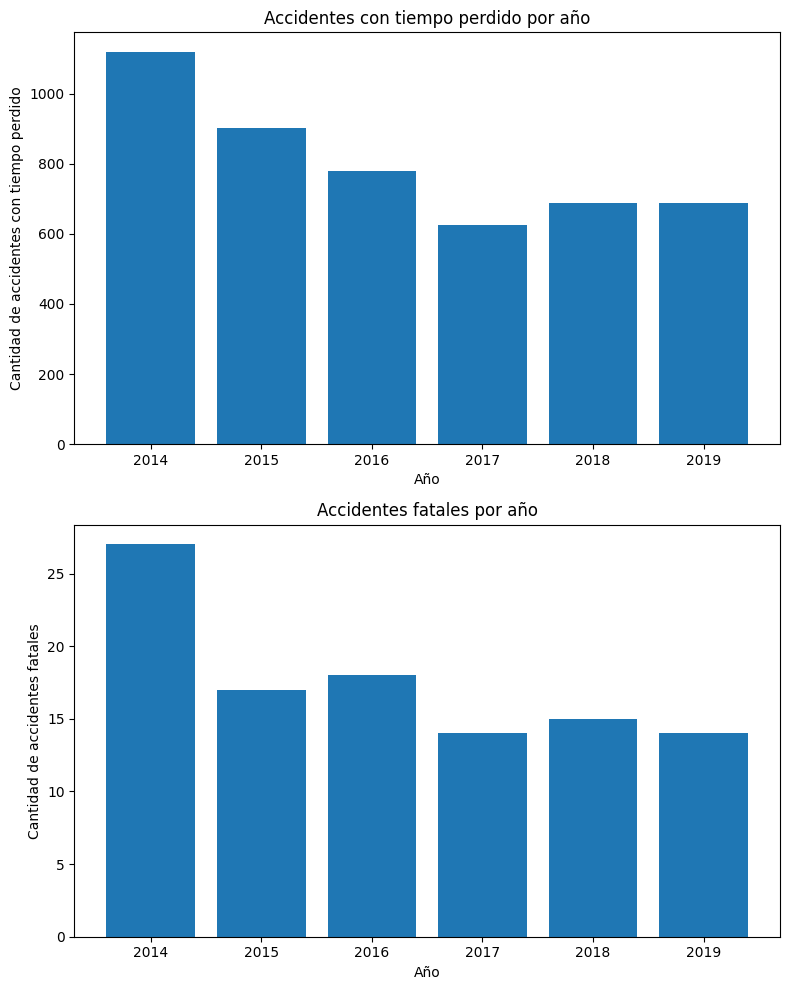

In [ ]:
#4 Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por año. Interpretar los gráficos.
# Agrupar los datos por año y calcula la cantidad de accidentes con tiempo perdido y fatales
grupo_por_año = historico_accidentes.groupby("AÑO")
accTiempoPerdidoAño = grupo_por_año["ACCIDENTE CON TIEMPO PERDIDO"].sum()
accFatalesAño = grupo_por_año["ACCIDENTE FATAL"].sum()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
ax1.bar(accTiempoPerdidoAño.index, accTiempoPerdidoAño.values)
ax1.set_xlabel("Año")
ax1.set_ylabel("Cantidad de accidentes con tiempo perdido")
ax1.set_title("Accidentes con tiempo perdido por año")

ax2.bar(accFatalesAño.index, accFatalesAño.values)
ax2.set_xlabel("Año")
ax2.set_ylabel("Cantidad de accidentes fatales")
ax2.set_title("Accidentes fatales por año")

plt.tight_layout()
plt.show()

En el primer grafico se observa una disminnucion de accidentes con tiempo perdido hasta el 2017. El primer año (2014) los accidentes con tiempo perdido eran numerosos, pero fueron disminuyendo progresivamente hasta el 2017. Entre el 2018 y 2019 estos aumentaron nuevamente pero no de una forma tan excesiva, y se mantuvieron en ese nivel. Se podria asumir que la empresa mejoró su seguridad en sus trabajadores desde el 2014 ya que estaban teniendo demasiados accidentes en los que sus trabajadores quedaban con reposo medico.
En el segundo grafico se observa que en el 2014 los accidentes fatalas eran tambien elevados, y fueron disminuyendo hasta el 2019 con altos y bajos. Se puede asumir que, por la misma razon del analisis anterior, la empresa mejoró la seguridad.

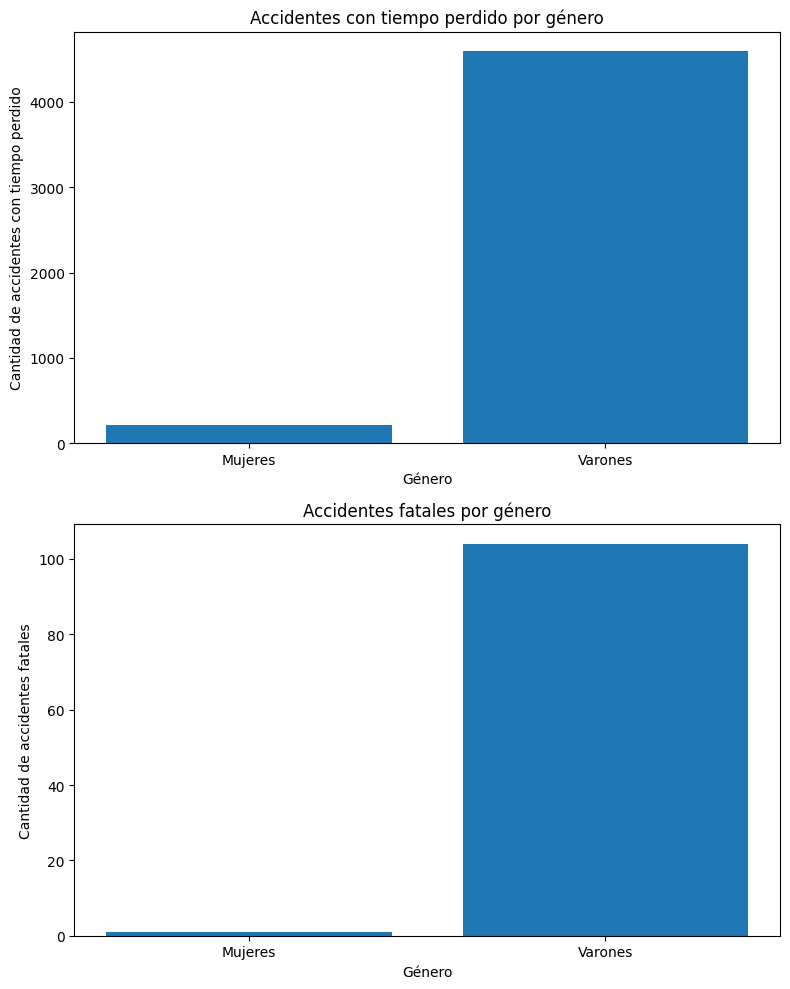

In [ ]:
#5 Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por género. Interpretar los gráficos.
# igual que para los graficos anteriores, se agrupan los datos por género y se calcula la cantidad de accidentes con tiempo perdido y fatales
grupo_por_genero = historico_accidentes.groupby("GÉNERO")
accTiempoPerdidoGenero = grupo_por_genero["ACCIDENTE CON TIEMPO PERDIDO"].sum()
accFatalesGenero = grupo_por_genero["ACCIDENTE FATAL"].sum()

# Crea una figura y los subgráficos de barras
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Configura el primer subgráfico de barras (Accidentes con tiempo perdido por género)
ax1.bar(accTiempoPerdidoGenero.index, accTiempoPerdidoGenero.values)
ax1.set_xlabel("Género")
ax1.set_ylabel("Cantidad de accidentes con tiempo perdido")
ax1.set_title("Accidentes con tiempo perdido por género")

# Configura el segundo subgráfico de barras (Accidentes fatales por género)
ax2.bar(accFatalesGenero.index, accFatalesGenero.values)
ax2.set_xlabel("Género")
ax2.set_ylabel("Cantidad de accidentes fatales")
ax2.set_title("Accidentes fatales por género")

# Ajusta el espaciado entre subgráficos y muestra el gráfico
plt.tight_layout()
plt.show()

En ambos graficos, se puede observar como la mayoria de accidentes ya sea fatales o con reposo medico pasaban a varones. Esto se puede deber a diversas razones, en las que se puede asumir las siguientes:

1.- Los varones están en peustos de trabajo más suceptibles a accidentes

2.- En la empresa hay mas trabajadores hombres que mujeres

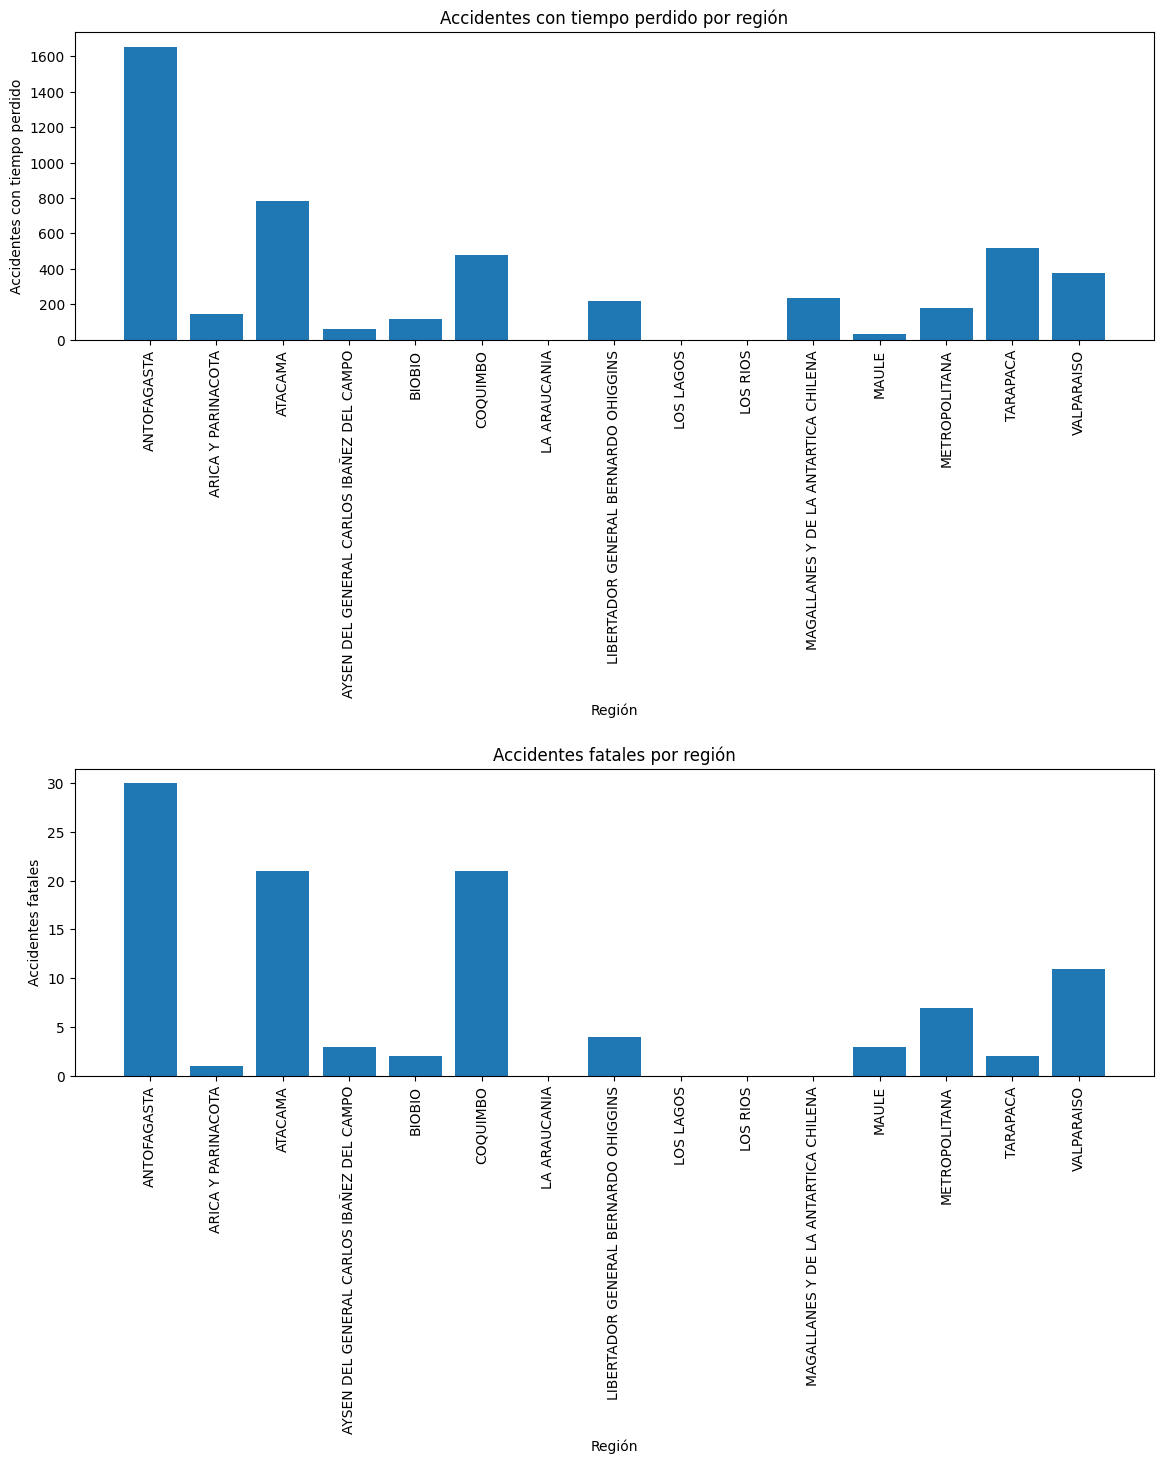

In [ ]:
#6 Generar subgráficos de barras que indiquen la cantidad de accidentes con tiempo perdido y fatales por región. Interpretar los gráficos.
# se agrupan nuevamente los datos, esta vez por región,  y se calcula la cantidad de accidentes con tiempo perdido y fatales
grupo_por_region = historico_accidentes.groupby("REGIÓN")
accTiempoPerdidoRegion = grupo_por_region["ACCIDENTE CON TIEMPO PERDIDO"].sum()
accFatalesRegion = grupo_por_region["ACCIDENTE FATAL"].sum()

# Crea una figura y los subgráficos de barras
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

# Configura el primer subgráfico de barras (Accidentes con tiempo perdido por región)
ax1.bar(accTiempoPerdidoRegion.index, accTiempoPerdidoRegion.values)
ax1.set_xlabel("Región")
ax1.set_ylabel("Accidentes con tiempo perdido")
ax1.set_title("Accidentes con tiempo perdido por región")
ax1.tick_params(axis="x", rotation=90)

# Configura el segundo subgráfico de barras (Accidentes fatales por región)
ax2.bar(accFatalesRegion.index, accFatalesRegion.values)
ax2.set_xlabel("Región")
ax2.set_ylabel("Accidentes fatales")
ax2.set_title("Accidentes fatales por región")
ax2.tick_params(axis="x", rotation=90)

# Ajusta el espaciado entre subgráficos y muestra el gráfico
plt.tight_layout(pad=2)
plt.show()

Se observa que las regiones mas afectadas por accidentes mas graves son antofagasta, atacama, coquimbo y valparaíso. Se puede asumir que hay regiones con nulos o muy pocos accidentes porque quizas los puestos de trabajo no son expuestos como podría ser estar en la misma mina, si no que estar en una oficina; o bien no hay una sede de la empresa en esa region. Siguiendo la misma logica, y teniendo en cuenta que en calama y antofagasta están las principales minas, probablemente hay mas accidentes por ser trabajos en terreno.

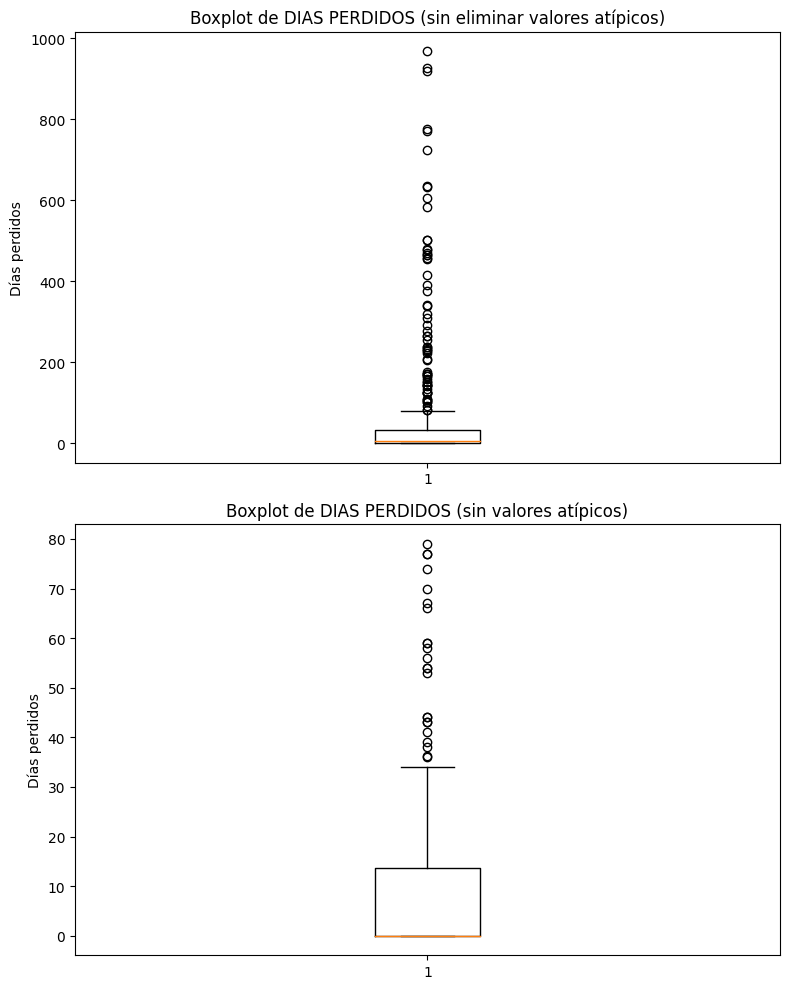

In [ ]:
#7 Crear subgráficos boxplot para la columna DIAS PERDIDOS. Elimine los valores atípicos y grafique nuevamente.
# se obtienen los valores de la columna dias perdidos
dias_perdidos = historico_accidentes["DIAS PERDIDOS"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.boxplot(dias_perdidos)
ax1.set_ylabel("Días perdidos")
ax1.set_title("Boxplot de DIAS PERDIDOS (sin eliminar valores atípicos)")

Q1 = np.percentile(dias_perdidos, 25)
Q3 = np.percentile(dias_perdidos, 75)
IQR = Q3 - Q1

# Define el umbral para considerar valores atípicos
umbral = 1.5

limite_inferior = Q1 - umbral * IQR
limite_superior = Q3 + umbral * IQR

# Elimina los valores atípicos
dias_perdidos_sin_outliers = dias_perdidos[(dias_perdidos >= limite_inferior) & (dias_perdidos <= limite_superior)]

ax2.boxplot(dias_perdidos_sin_outliers)
ax2.set_ylabel("Días perdidos")
ax2.set_title("Boxplot de DIAS PERDIDOS (sin valores atípicos)")

plt.tight_layout()
plt.show()